# Insights from Lok Sabha Elections 2014 and 2019: An AtliQ Media Analysis

### Problem Statement

   AtliQ Media is a private media company and they wanted to telecast a show on Lok Sabha elections 2024 in India. Unlike other channels they do not want to have a debate on who is going to win this election, they rather wanted to present insights from 2014 and 2019 elections without any bias and discuss less explored themes like voter turnout percentage in India. Peter is a data analyst in the company, and he is handed over this task of generating meaningful insights from data. Since this is a sensitive topic, he seeked help from his manager Tony Sharma who provided the list of primary and secondary questions.

### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df_2014 = pd.read_csv(r"C:\Users\madhavandata\Downloads\RPC11_Input_For_Participants\RPC11_Input_For_Participants\datasets\constituency_wise_results_2014.csv")
df_2019 = pd.read_csv(r"C:\Users\madhavandata\Downloads\RPC11_Input_For_Participants\RPC11_Input_For_Participants\datasets\constituency_wise_results_2019.csv")
state_codes = pd.read_csv(r"C:\Users\madhavandata\Downloads\RPC11_Input_For_Participants\RPC11_Input_For_Participants\datasets\dim_states_codes.csv")

In [4]:
df_2014.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


In [5]:
df_2019.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418


In [6]:
state_codes.head()

,state_name,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP
2,Arunachal Pradesh,AR
3,Assam,AS
4,Bihar,BR


In [7]:
df_2014.info()
print(" ")
df_2019.info()
print(" ")
state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8355 non-null   object 
 1   pc_name         8355 non-null   object 
 2   candidate       8355 non-null   object 
 3   sex             7845 non-null   object 
 4   age             7845 non-null   float64
 5   category        7845 non-null   object 
 6   party           8355 non-null   object 
 7   party_symbol    8355 non-null   object 
 8   general_votes   8355 non-null   int64  
 9   postal_votes    8355 non-null   int64  
 10  total_votes     8355 non-null   int64  
 11  total_electors  8355 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  


In [10]:
set(df_2019["state"].unique())^set(df_2014["state"].unique())

{'Chhattisgarh', 'Odisha', 'Telangana'}

In [11]:
df_2014["pc_name"] = df_2014["pc_name"].str.strip().str.title()
df_2019["pc_name"] = df_2019["pc_name"].str.strip().str.title()

In [12]:
df_2014.loc[df_2014["category"]=="Gen","category"]="GEN"
df_2019.loc[df_2019["category"]=="GENERAL","category"]="GEN"

In [13]:
df_2014.loc[df_2014["sex"]=="M","sex"] = "MALE"
df_2014.loc[df_2014["sex"]=="F","sex"] = "FEMALE"
df_2014.loc[df_2014["sex"]=="O","sex"] = "THIRD"

In [14]:
df_2014["category"].unique()

array(['ST', nan, 'SC', 'GEN'], dtype=object)

In [15]:
df_2014["sex"].unique()

array(['MALE', nan, 'FEMALE', 'THIRD'], dtype=object)

In [16]:
df_2019["category"].unique()

array(['ST', nan, 'GEN', 'SC'], dtype=object)

In [17]:
df_2019["sex"].unique()

array(['MALE', 'FEMALE', nan, 'THIRD'], dtype=object)

In [18]:
import pandas as pd
from thefuzz import process, fuzz

unique_pc_names_2014 = df_2014['pc_name'].unique()
unique_pc_names_2019 = df_2019['pc_name'].unique()

def get_matches(threshold):
    matches = []
    for name in unique_pc_names_2014:
        match, score = process.extractOne(name, unique_pc_names_2019, scorer=fuzz.token_sort_ratio)
        if score >= threshold:
            matches.append((name, match, score))
    return matches

matches_to_review = get_matches(80)
print("\nMatches with score >= 80 and < 100 for review:")
for name_2014, name_2019, score in matches_to_review:
    if score < 100:
        print(f"2014: {name_2014} --> 2019: {name_2019} (Score: {score})")



Matches with score >= 80 and < 100 for review:
2014: Chelvella --> 2019: Chevella (Score: 94)
2014: Bikaner --> 2019: Bikaner (Sc) (Score: 82)
2014: Joynagar --> 2019: Jaynagar (Score: 88)
2014: Burdwan - Durgapur --> 2019: Bardhaman Durgapur (Score: 82)
2014: Dadar & Nagar Haveli --> 2019: Dadra And Nagar Haveli (Score: 85)


In [19]:
name_mapping = {name_2014: name_2019 for name_2014, name_2019, score in matches_to_review}

df_2014['pc_name'] = df_2014['pc_name'].apply(lambda x: name_mapping.get(x, x))

In [20]:
df_2014.loc[df_2014['pc_name']=="Dadra And Nagar Haveli"].head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
8143,Dadra & Nagar Haveli,Dadra And Nagar Haveli,KHULAT JANIYABHAI CHANDUBHAI,MALE,58.0,ST,NCP,Clock,1611,0,1611,196597
8144,Dadra & Nagar Haveli,Dadra And Nagar Haveli,DELKAR MOHANBHAI SANJIBHAI,MALE,51.0,ST,INC,Hand,74576,0,74576,196597
8145,Dadra & Nagar Haveli,Dadra And Nagar Haveli,PATEL NATUBHAI GOMANBHAI,MALE,41.0,ST,BJP,Lotus,80790,0,80790,196597
8146,Dadra & Nagar Haveli,Dadra And Nagar Haveli,PATEL HEMANTBHAI KESHAVBHAI,MALE,43.0,ST,BSP,Elephant,982,0,982,196597
8147,Dadra & Nagar Haveli,Dadra And Nagar Haveli,KISHAN NATHU GHUTIYA,MALE,44.0,ST,SHS,Bow & Arrow,378,0,378,196597


In [21]:
Telangana_pc = list(df_2019.loc[df_2019["state"] == "Telangana"]["pc_name"].unique())

In [22]:
df_2014.loc[df_2014["pc_name"].isin(Telangana_pc),"state"] = "Telangana"

In [23]:
df_2019.loc[df_2019["state"] == "Andhra Pradesh"]["pc_name"].unique() == df_2014.loc[df_2014["state"] == "Andhra Pradesh"]["pc_name"].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [24]:
set(df_2019["state"].unique())^set(df_2014["state"].unique())

{'Chhattisgarh', 'Odisha'}

In [25]:
df_2014.duplicated().unique()

array([False])

In [26]:
df_2019.duplicated().unique()

array([False])

* Data has been loaded.
* Standardized the gender and sex data to a common format in the 2014 and 2019 datasets.
* Renamed the "pc_name" column to "constituency".
* Handled identical and spelling error values in the "constituency" column using the fuzz library.

### 1 . List top 5 / bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio?

In [27]:
df_2014.rename(columns={'pc_name': 'constituency'}, inplace=True)
df_2019.rename(columns={'pc_name': 'constituency'}, inplace=True)

In [28]:
grouped_2014 = df_2014.groupby(['constituency',"state", 'total_electors']).sum().reset_index()
grouped_2019 = df_2019.groupby(['constituency',"state", 'total_electors']).sum().reset_index()

grouped_2014['voter_turnout_ratio (%)'] = (grouped_2014['total_votes'] / grouped_2014['total_electors'])*100
grouped_2019['voter_turnout_ratio (%)'] = (grouped_2019['total_votes'] / grouped_2019['total_electors'])*100

sorted_2014 = grouped_2014.sort_values(by='voter_turnout_ratio (%)', ascending=False)
sorted_2019 = grouped_2019.sort_values(by='voter_turnout_ratio (%)', ascending=False)

top_5_2014 = sorted_2014.head(5)
bottom_5_2014 = sorted_2014.tail(5).sort_values(by='voter_turnout_ratio (%)')
top_5_2019 = sorted_2019.head(5)
bottom_5_2019 = sorted_2019.tail(5).sort_values(by='voter_turnout_ratio (%)')

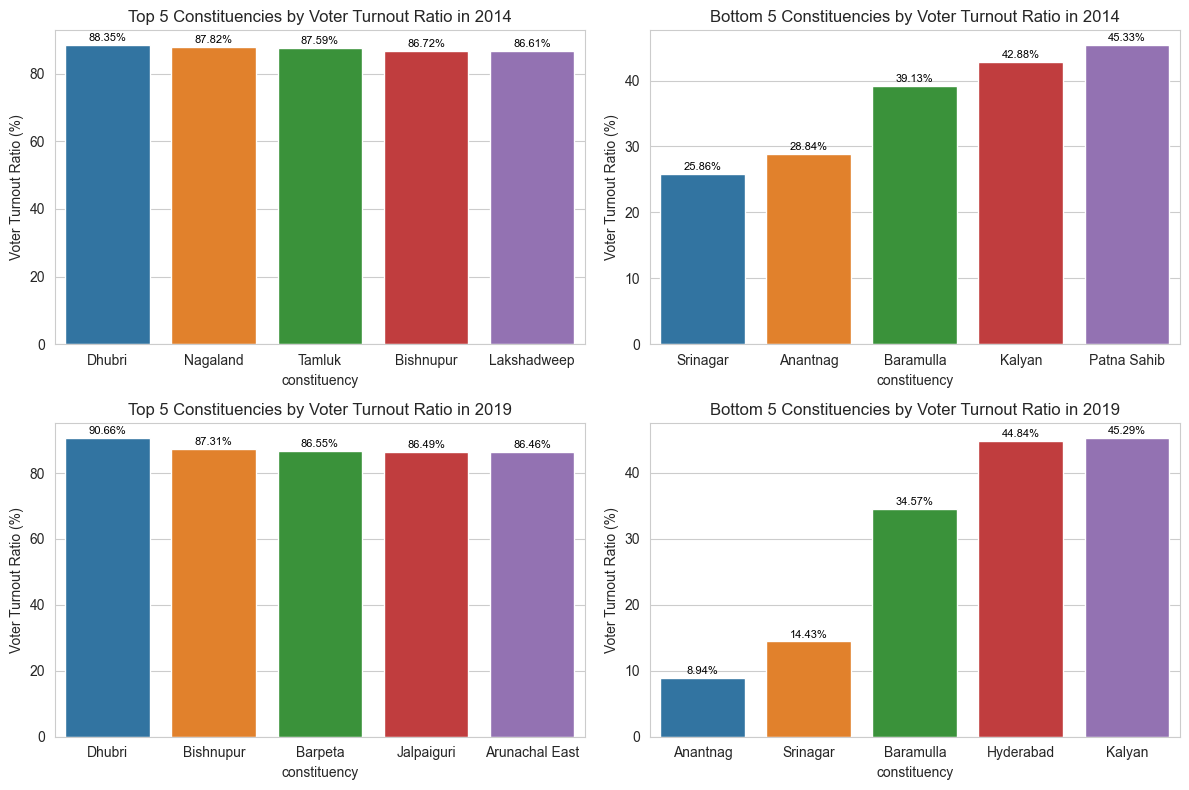

In [29]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='constituency', y='voter_turnout_ratio (%)', hue='constituency', data=top_5_2014)
plt.title('Top 5 Constituencies by Voter Turnout Ratio in 2014')
plt.ylabel('Voter Turnout Ratio (%)')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.subplot(2, 2, 2)
sns.barplot(x='constituency', y='voter_turnout_ratio (%)', hue='constituency', data=bottom_5_2014)
plt.title('Bottom 5 Constituencies by Voter Turnout Ratio in 2014')
plt.ylabel('Voter Turnout Ratio (%)')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.subplot(2, 2, 3)
sns.barplot(x='constituency', y='voter_turnout_ratio (%)', hue='constituency', data=top_5_2019)
plt.title('Top 5 Constituencies by Voter Turnout Ratio in 2019')
plt.ylabel('Voter Turnout Ratio (%)')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.subplot(2, 2, 4)
sns.barplot(x='constituency', y='voter_turnout_ratio (%)', hue='constituency', data=bottom_5_2019)
plt.title('Bottom 5 Constituencies by Voter Turnout Ratio in 2019')
plt.ylabel('Voter Turnout Ratio (%)')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()

plt.show()


##### Not only do the Anantnag, Srinagar, and Baramulla constituencies, which belong to Jammu & Kashmir, have the lowest voter turnout ratios, but also the ratios for Anantnag and Srinagar decreased drastically.



#####

### 2. List top 5 / bottom 5 states of 2014 and 2019 in terms of voter turnout ratio?

In [30]:
grouped_2014_state = grouped_2014.groupby(['state'])[["total_votes","total_electors"]].sum().reset_index()
grouped_2019_state = grouped_2019.groupby(['state'])[["total_votes","total_electors"]].sum().reset_index()

grouped_2014_state['voter_turnout_ratio (%)'] = (grouped_2014_state['total_votes'] / grouped_2014_state['total_electors'])*100
grouped_2019_state['voter_turnout_ratio (%)'] = (grouped_2019_state['total_votes'] / grouped_2019_state['total_electors'])*100

sorted_2014_state = grouped_2014_state.sort_values(by='voter_turnout_ratio (%)', ascending=False)
sorted_2019_state = grouped_2019_state.sort_values(by='voter_turnout_ratio (%)', ascending=False)

top_5_2014_state = sorted_2014_state.head(5)
bottom_5_2014_state = sorted_2014_state.tail(5).sort_values(by='voter_turnout_ratio (%)')
top_5_2019_state = sorted_2019_state.head(5)
bottom_5_2019_state = sorted_2019_state.tail(5).sort_values(by='voter_turnout_ratio (%)')

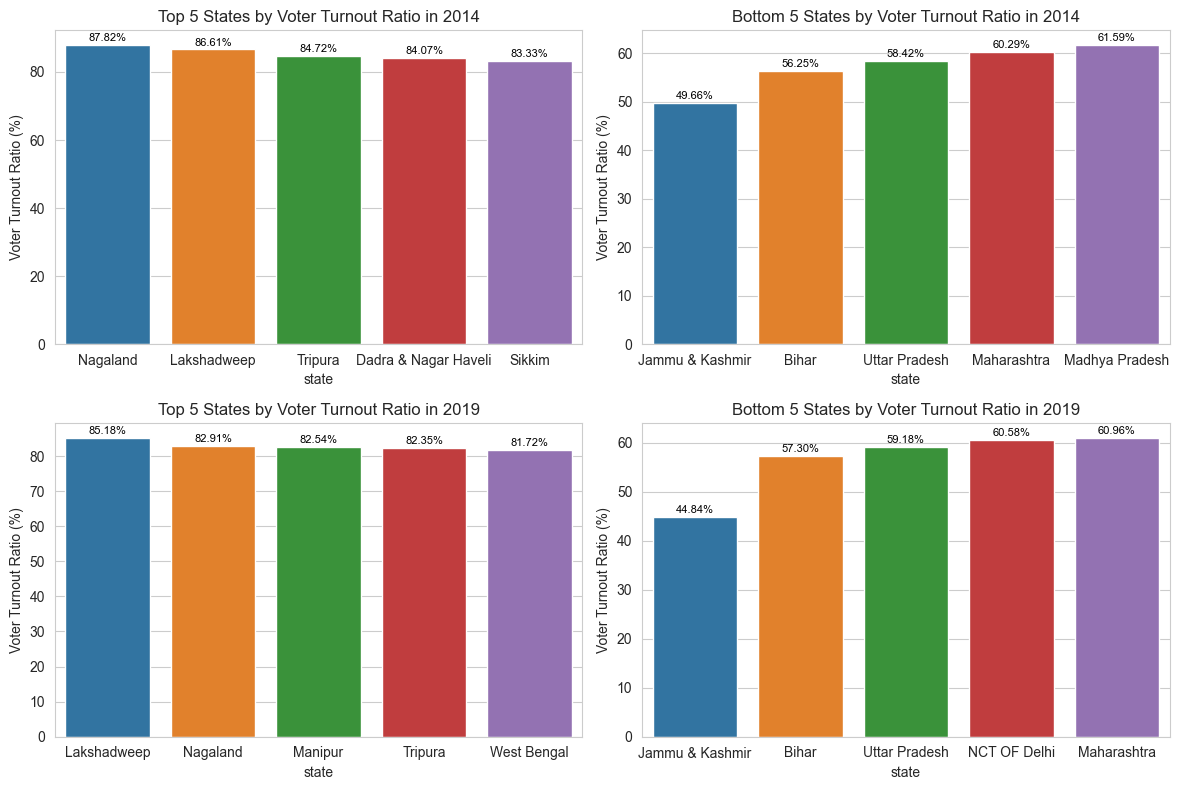

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='state', y='voter_turnout_ratio (%)', hue='state', dodge=False, data=top_5_2014_state)
plt.title('Top 5 States by Voter Turnout Ratio in 2014')
plt.ylabel('Voter Turnout Ratio (%)')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')
    
plt.subplot(2, 2, 2)
sns.barplot(x='state', y='voter_turnout_ratio (%)', hue='state', dodge=False, data=bottom_5_2014_state)
plt.title('Bottom 5 States by Voter Turnout Ratio in 2014')
plt.ylabel('Voter Turnout Ratio (%)')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.subplot(2, 2, 3)
sns.barplot(x='state', y='voter_turnout_ratio (%)', hue='state', dodge=False, data=top_5_2019_state)
plt.title('Top 5 States by Voter Turnout Ratio in 2019')
plt.ylabel('Voter Turnout Ratio (%)')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')


plt.subplot(2, 2, 4)
sns.barplot(x='state', y='voter_turnout_ratio (%)', hue='state', dodge=False, data=bottom_5_2019_state)
plt.title('Bottom 5 States by Voter Turnout Ratio in 2019')
plt.ylabel('Voter Turnout Ratio (%)')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()

plt.show()


### 3. Which constituencies have elected the same party for two consecutive elections, rank them by % of votes to that winning party in 2019?

In [32]:
winners_2014 = df_2014.loc[df_2014.groupby('constituency')['total_votes'].idxmax()]
winners_2019 = df_2019.loc[df_2019.groupby('constituency')['total_votes'].idxmax()]

common_winners = pd.merge(winners_2014,winners_2019,on=["state","constituency","party"],suffixes=("_2014","_2019"))
common_winners["vote_percentage_2019 (%)"] = (common_winners["total_votes_2019"]/common_winners["total_electors_2019"])*100

common_winners = common_winners.sort_values(by="vote_percentage_2019 (%)",ascending = False)

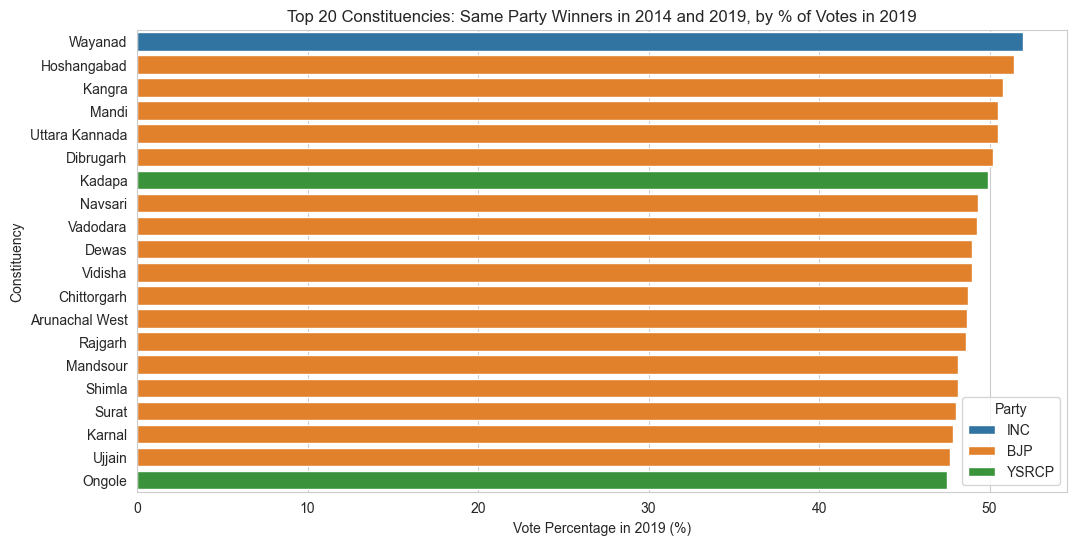

In [33]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='vote_percentage_2019 (%)', y='constituency', hue='party', data=common_winners.head(20))

plt.title('Top 20 Constituencies: Same Party Winners in 2014 and 2019, by % of Votes in 2019')
plt.xlabel('Vote Percentage in 2019 (%)')
plt.ylabel('Constituency')

plt.legend(title='Party')

plt.show()

##### It was observed that BJP appeared in the top 17 out of top 20 cases where the same party was elected for two consecutive elections, ranked by the percentage of votes to that winning party in 2019.

#####

### 4. Which constituencies have voted for different parties in two elections (list top 10 based on difference (201 9-2014) in winner vote percentage in two elections)?

In [113]:
winners_2014 = df_2014.loc[df_2014.groupby('constituency')['total_votes'].idxmax()]
winners_2019 = df_2019.loc[df_2019.groupby('constituency')['total_votes'].idxmax()]

different_winners = pd.merge(winners_2014,winners_2019,on=["state","constituency"],suffixes=("_2014","_2019"))
different_winners = different_winners[different_winners["party_2014"] != different_winners["party_2019"]]
different_winners["vote_percentage_2019 (%)"] = (different_winners["total_votes_2019"]/different_winners["total_electors_2019"])*100
different_winners["vote_percentage_2014 (%)"] = (different_winners["total_votes_2014"]/different_winners["total_electors_2014"])*100
different_winners["difference_in_vote_percentage (%)"] = different_winners["vote_percentage_2019 (%)"]-different_winners["vote_percentage_2014 (%)"]
different_winners = different_winners.sort_values(by="difference_in_vote_percentage (%)",ascending=False).head(10).reset_index()
different_winners[["constituency","state","party_2019","party_2014","difference_in_vote_percentage (%)"]]

,constituency,state,party_2019,party_2014,difference_in_vote_percentage (%)
0,Alipurduars,West Bengal,BJP,AITC,20.906514
1,Autonomous District,Assam,BJP,INC,17.553742
2,Puducherry,Puducherry,INC,AINRC,17.331308
3,Kanniyakumari,Tamil Nadu,INC,BJP,16.375003
4,Chikkballapur,Karnataka,BJP,INC,15.623508
5,Kolar,Karnataka,BJP,INC,15.448320
6,Sambhal,Uttar Pradesh,SP,BJP,14.705469
7,Supaul,Bihar,JD(U),INC,13.511853
8,Giridih,Jharkhand,AJSUP,BJP,13.377221
9,Perambalur,Tamil Nadu,DMK,ADMK,13.130247


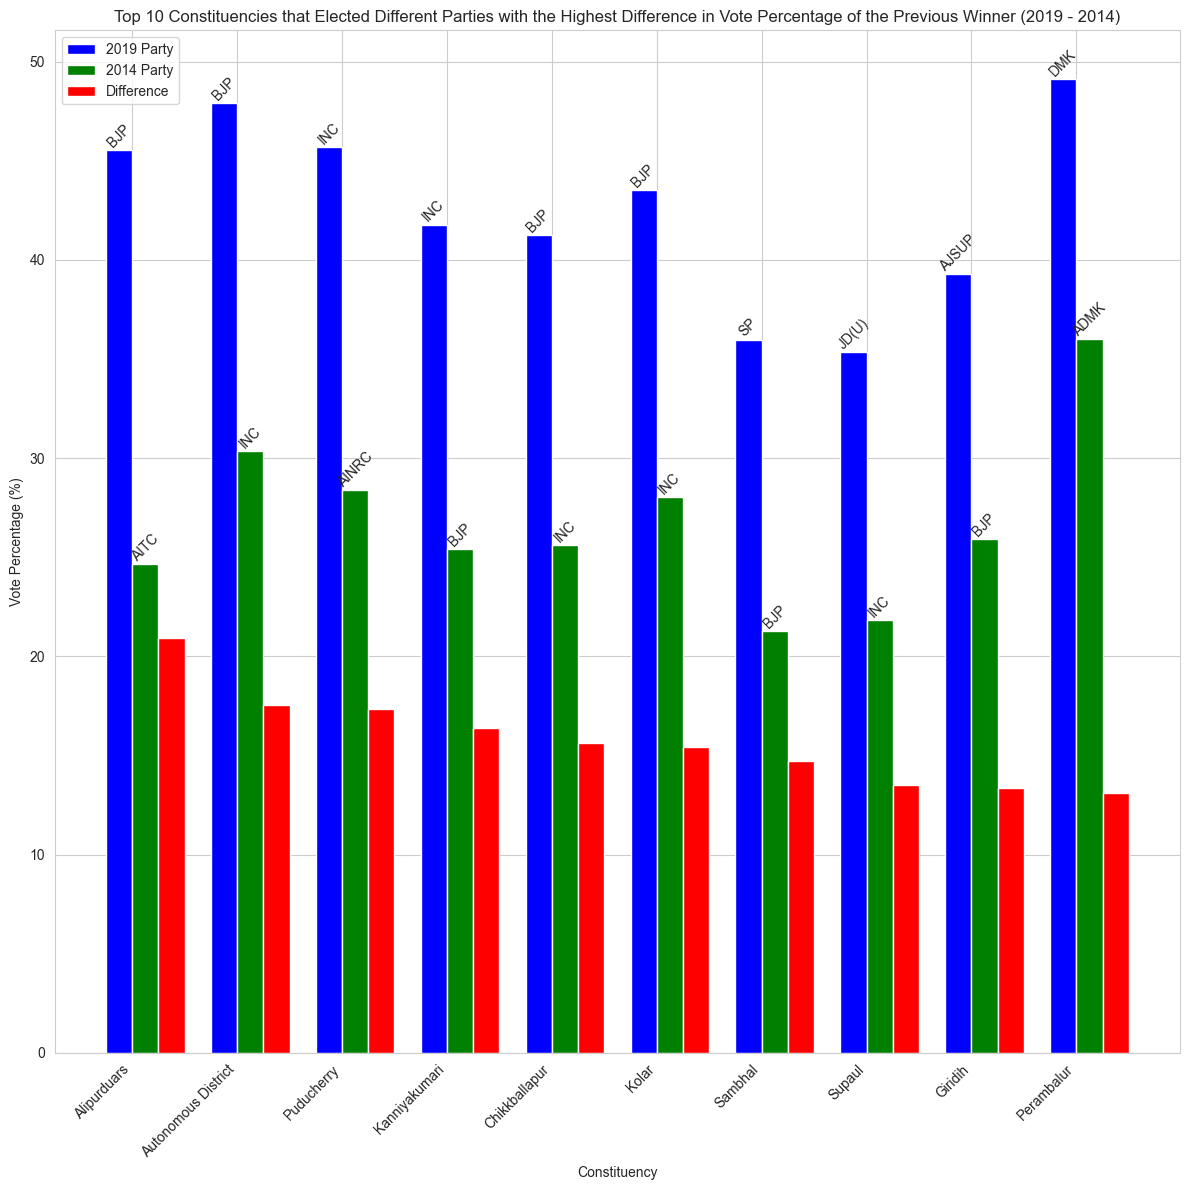

In [35]:
plt.figure(figsize=(12, 12))

num_constituencies = len(different_winners)
bar_width = 0.25
index = np.arange(num_constituencies)

bars1 = plt.bar(index, different_winners['vote_percentage_2019 (%)'], color='b', width=bar_width)
bars2 = plt.bar(index + bar_width, different_winners['vote_percentage_2014 (%)'], color='g', width=bar_width)
bars3 = plt.bar(index + 2 * bar_width, different_winners['difference_in_vote_percentage (%)'], color='red', width=bar_width)

plt.xticks(index + bar_width / 2, different_winners['constituency'], rotation=45, ha='right') # Adjust rotation to 45 degrees
plt.title('Top 10 Constituencies that Elected Different Parties with the Highest Difference in Vote Percentage of the Previous Winner (2019 - 2014)')
plt.xlabel('Constituency')
plt.ylabel('Vote Percentage (%)')


plt.legend(['2019 Party', '2014 Party', 'Difference'], loc='upper left')

for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), different_winners['party_2019'].iloc[i], ha='center', va='bottom', rotation=45) # Rotate the labels by 45 degrees
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), different_winners['party_2014'].iloc[i], ha='center', va='bottom', rotation=45) # Rotate the labels by 45 degrees

plt.tight_layout()
plt.show()

### 5. Top 5 candidates based on margin difference with runners in 2014 and 2019.

In [36]:
runners_2014 = df_2014.groupby('constituency').apply(lambda x: x.nlargest(2, 'total_votes').iloc[-1]).reset_index(drop=True)
runners_2019 = df_2019.groupby('constituency').apply(lambda x: x.nlargest(2, 'total_votes').iloc[-1]).reset_index(drop=True)

merged_2014 = pd.merge(winners_2014, runners_2014[['constituency', 'total_votes']], on='constituency', suffixes=('_winner', '_runner'))
merged_2019 = pd.merge(winners_2019, runners_2019[['constituency', 'total_votes']], on='constituency', suffixes=('_winner', '_runner'))

merged_2014['margin_difference_2014'] = abs(merged_2014['total_votes_winner'] - merged_2014['total_votes_runner'])
merged_2019['margin_difference_2019'] = abs(merged_2019['total_votes_winner'] - merged_2019['total_votes_runner'])

top_5_candidates_2014 = merged_2014.sort_values(by='margin_difference_2014', ascending=False).head(5)
top_5_candidates_2019 = merged_2019.sort_values(by='margin_difference_2019', ascending=False).head(5)

In [37]:
top_5_candidates_2014[["candidate","party","margin_difference_2014","constituency","state"]]

,candidate,party,margin_difference_2014,constituency,state
490,NARENDRA MODI,BJP,570128,Vadodara,Gujarat
175,VIJAY KUMAR SINGH,BJP,567260,Ghaziabad,Uttar Pradesh
354,C. R. PATIL,BJP,558116,Navsari,Gujarat
212,RAMCHARAN BOHARA,BJP,539345,Jaipur,Rajasthan
457,DARSHANA VIKRAM JARDOSH,BJP,533190,Surat,Gujarat


In [38]:
top_5_candidates_2019[["candidate","party","margin_difference_2019","constituency","state"]]

,candidate,party,margin_difference_2019,constituency,state
379,C. R. Patil,BJP,689668,Navsari,Gujarat
272,Sanjay Bhatia,BJP,656142,Karnal,Haryana
171,KRISHAN PAL,BJP,638239,Faridabad,Haryana
94,SUBHASH CHANDRA BAHERIA,BJP,612000,Bhilwara,Rajasthan
522,RANJANBEN BHATT,BJP,589177,Vadodara,Gujarat


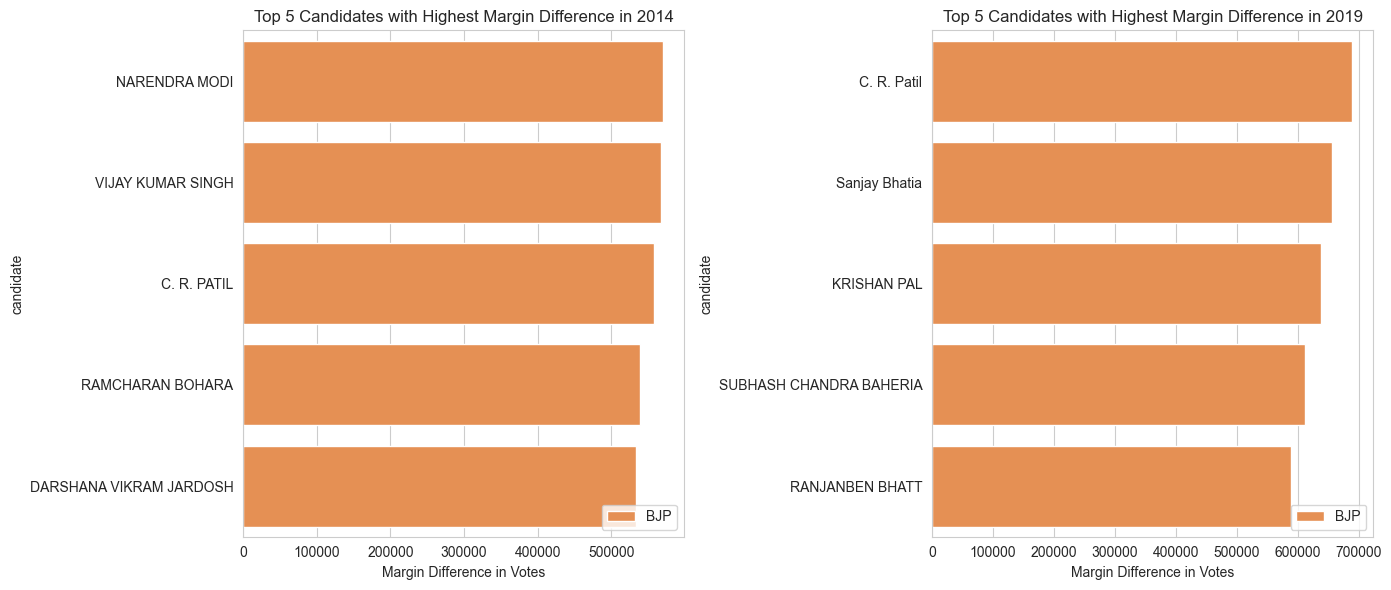

In [39]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='margin_difference_2014', y='candidate', hue='party', data=top_5_candidates_2014,
            palette='Oranges', dodge=False)
plt.xlabel('Margin Difference in Votes')
plt.title('Top 5 Candidates with Highest Margin Difference in 2014')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
sns.barplot(x='margin_difference_2019', y='candidate', hue='party', data=top_5_candidates_2019,
            palette='Oranges', dodge=False)
plt.xlabel('Margin Difference in Votes')
plt.title('Top 5 Candidates with Highest Margin Difference in 2019')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

##### The top 5 candidates with the highest margin difference compared to the runner-up in both years belong to the BJP party.



#####

### 6. % Split of votes of parties between 2014 vs 2019 at national level

In [46]:
total_votes_2014 = df_2014.groupby('party')['total_votes'].sum().reset_index()
total_votes_2019 = df_2019.groupby('party')['total_votes'].sum().reset_index()

total_votes_2014['percentage_votes_2014'] = (total_votes_2014['total_votes'] / total_votes_2014['total_votes'].sum()) * 100
total_votes_2019['percentage_votes_2019'] = (total_votes_2019['total_votes'] / total_votes_2019['total_votes'].sum()) * 100

percentage_split_2014 = total_votes_2014.nlargest(10, 'percentage_votes_2014')
percentage_split_2019 = total_votes_2019.nlargest(10, 'percentage_votes_2019')

other_2014 = 100 - percentage_split_2014['percentage_votes_2014'].sum()
other_2019 = 100 - percentage_split_2019['percentage_votes_2019'].sum()

other_row_2014 = pd.DataFrame({'party': ['Other'], 'percentage_votes_2014': [other_2014]})
other_row_2019 = pd.DataFrame({'party': ['Other'], 'percentage_votes_2019': [other_2019]})

percentage_split_2014 = pd.concat([percentage_split_2014, other_row_2014], ignore_index=True)
percentage_split_2019 = pd.concat([percentage_split_2019, other_row_2019], ignore_index=True)

In [47]:
percentage_split_2014

,party,total_votes,percentage_votes_2014
0,BJP,161047761.0,30.969622
1,INC,96641749.0,18.584291
2,BSP,22434033.0,4.314084
3,AITC,21215661.0,4.079790
4,SP,18632568.0,3.583059
5,ADMK,18111579.0,3.482872
6,CPM,17938138.0,3.449519
7,IND,15888094.0,3.055294
8,TDP,14099230.0,2.711294
9,YSRCP,13995435.0,2.691334


In [48]:
percentage_split_2019

,party,total_votes,percentage_votes_2019
0,BJP,229076879.0,37.298440
1,INC,119495214.0,19.456285
2,AITC,24929330.0,4.059009
3,BSP,22246501.0,3.622189
4,IND,16583326.0,2.700107
5,SP,15647206.0,2.547688
6,YSRCP,15537006.0,2.529745
7,DMK,14363332.0,2.338647
8,SHS,12858904.0,2.093695
9,TDP,12515345.0,2.037756


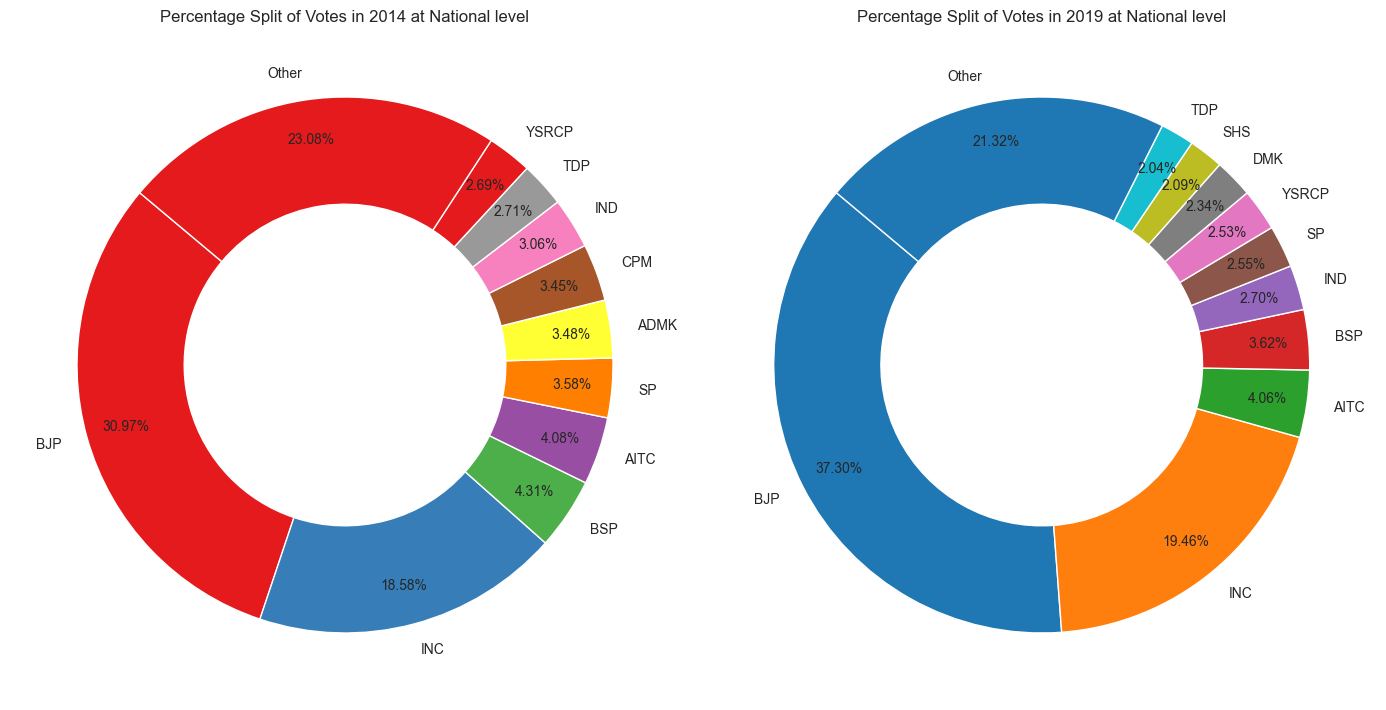

In [52]:
labels_2014 = percentage_split_2014['party']
sizes_2014 = percentage_split_2014['percentage_votes_2014']

labels_2019 = percentage_split_2019['party']
sizes_2019 = percentage_split_2019['percentage_votes_2019']

sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
colors = sns.color_palette("Set1", 10)

plt.subplot(1, 2, 1)
plt.pie(sizes_2014, labels=labels_2014, autopct='%1.2f%%', startangle=140,colors = colors,  pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Percentage Split of Votes in 2014 at National level')

plt.subplot(1, 2, 2)
plt.pie(sizes_2019, labels=labels_2019, autopct='%1.2f%%', startangle=140,  pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Percentage Split of Votes in 2019 at National level')

plt.tight_layout()
plt.show()

##### In both years, BJP received the highest percentage of votes at the national level, while INC secured the second-highest percentage of votes in both years.


#####

### 7. % Split of votes of parties between 2014 vs 2019 at state level.

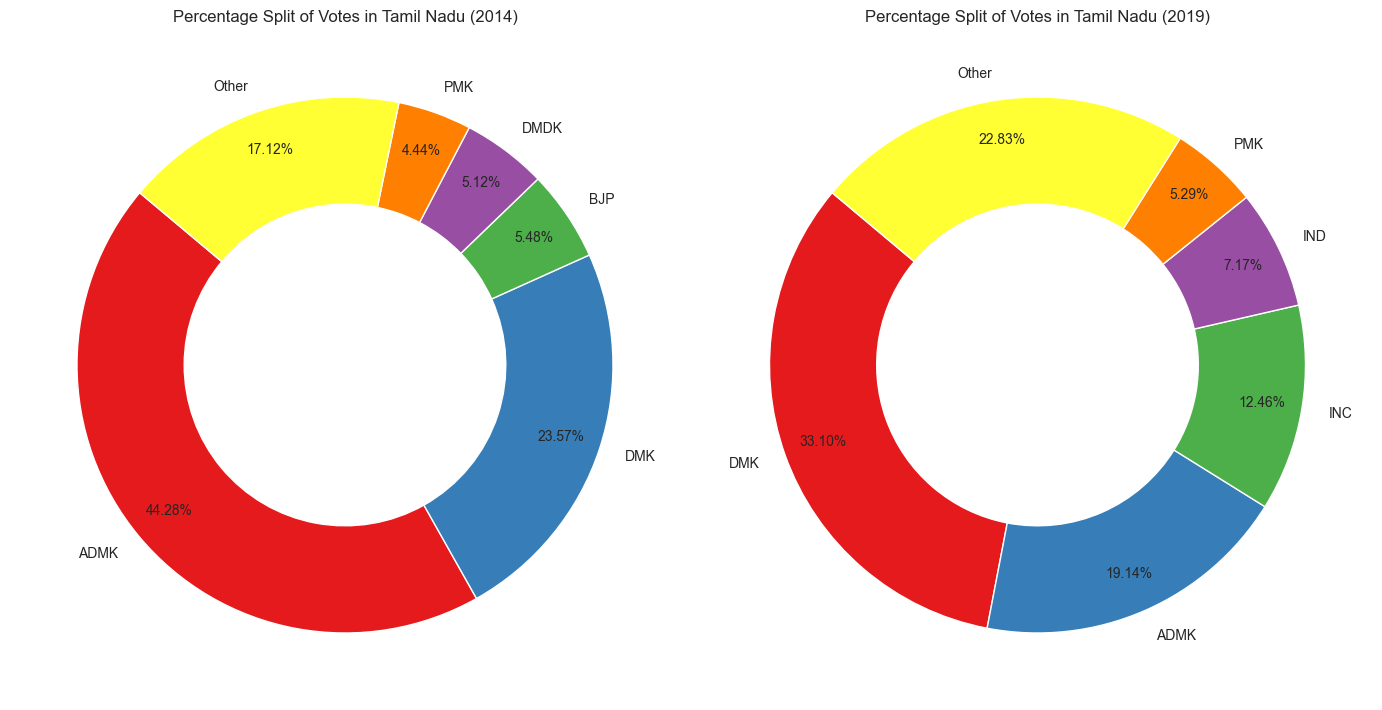

In [53]:
state_to_visualize = 'Tamil Nadu'

def visualize_votes_split(state_to_visualize):

    state_data_2014 = df_2014[df_2014['state'] == state_to_visualize]
    state_data_2019 = df_2019[df_2019['state'] == state_to_visualize]
    
 
    total_votes_2014 = state_data_2014.groupby('party')['total_votes'].sum().reset_index()
    total_votes_2014['percentage_votes_2014'] = (total_votes_2014['total_votes'] / total_votes_2014['total_votes'].sum()) * 100
    top_parties_2014 = total_votes_2014.nlargest(5, 'percentage_votes_2014')
    other_votes_2014 = total_votes_2014[~total_votes_2014['party'].isin(top_parties_2014['party'])]['total_votes'].sum()
    top_parties_2014 = pd.concat([top_parties_2014, pd.DataFrame({'party': ['Other'], 'total_votes': [other_votes_2014]})])
    top_parties_2014['percentage_votes_2014'] = (top_parties_2014['total_votes'] / top_parties_2014['total_votes'].sum()) * 100
    
   
    total_votes_2019 = state_data_2019.groupby('party')['total_votes'].sum().reset_index()
    total_votes_2019['percentage_votes_2019'] = (total_votes_2019['total_votes'] / total_votes_2019['total_votes'].sum()) * 100
    top_parties_2019 = total_votes_2019.nlargest(5, 'percentage_votes_2019')
    other_votes_2019 = total_votes_2019[~total_votes_2019['party'].isin(top_parties_2019['party'])]['total_votes'].sum()
    top_parties_2019 = pd.concat([top_parties_2019, pd.DataFrame({'party': ['Other'], 'total_votes': [other_votes_2019]})])
    top_parties_2019['percentage_votes_2019'] = (top_parties_2019['total_votes'] / top_parties_2019['total_votes'].sum()) * 100
    

    sns.set_style("whitegrid")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    
  
    colors_2014 = sns.color_palette("Set1", len(top_parties_2014))
    plt.subplot(1, 2, 1)
    plt.pie(top_parties_2014['percentage_votes_2014'], labels=top_parties_2014['party'], autopct='%1.2f%%', startangle=140, colors=colors_2014, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
    plt.title(f'Percentage Split of Votes in {state_to_visualize} (2014)')

    
    colors_2019 = sns.color_palette("Set1", len(top_parties_2019))
    plt.subplot(1, 2, 2)
    plt.pie(top_parties_2019['percentage_votes_2019'], labels=top_parties_2019['party'], autopct='%1.2f%%', startangle=140, colors=colors_2019, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
    plt.title(f'Percentage Split of Votes in {state_to_visualize} (2019)')

    plt.tight_layout()
    plt.show()


visualize_votes_split(state_to_visualize)

### 8. List top 5 constituencies for two major national parties where they have gained vote share in 2019 as compared to 2014.

In [54]:
bjp_2014 = df_2014[df_2014['party'] == 'BJP']
bjp_2019 = df_2019[df_2019['party'] == 'BJP']
inc_2014 = df_2014[df_2014['party'] == 'INC']
inc_2019 = df_2019[df_2019['party'] == 'INC']

bjp_votes_2014 = bjp_2014.groupby('constituency')['total_votes'].sum()
bjp_votes_2019 = bjp_2019.groupby('constituency')['total_votes'].sum()
inc_votes_2014 = inc_2014.groupby('constituency')['total_votes'].sum()
inc_votes_2019 = inc_2019.groupby('constituency')['total_votes'].sum()

bjp_merged = pd.merge(bjp_votes_2014, bjp_votes_2019, on='constituency', suffixes=('_2014', '_2019'))
inc_merged = pd.merge(inc_votes_2014, inc_votes_2019, on='constituency', suffixes=('_2014', '_2019'))

bjp_merged['vote_share_gain'] = bjp_merged['total_votes_2019'] - bjp_merged['total_votes_2014']
inc_merged['vote_share_gain'] = inc_merged['total_votes_2019'] - inc_merged['total_votes_2014']

top_bjp_vote_gain_constituencies = bjp_merged['vote_share_gain'].nlargest(5).reset_index()
top_inc_vote_gain_constituencies = inc_merged['vote_share_gain'].nlargest(5).reset_index()

bjp_merged['vote_share_loss'] = bjp_merged['total_votes_2019'] - bjp_merged['total_votes_2014']
inc_merged['vote_share_loss'] = inc_merged['total_votes_2019'] - inc_merged['total_votes_2014']

top_bjp_vote_lost_constituencies = bjp_merged['vote_share_loss'].nsmallest(5).reset_index()
top_inc_vote_lost_constituencies = inc_merged['vote_share_loss'].nsmallest(5).reset_index()

In [55]:
top_bjp_vote_gain_constituencies

,constituency,vote_share_gain
0,Purulia,581871
1,Ranaghat,549583
2,Jalpaiguri,538552
3,Tripura West,518826
4,Ghatal,515144


In [56]:
top_inc_vote_gain_constituencies

,constituency,vote_share_gain
0,Thiruvallur,723332
1,Karur,665238
2,Arani,590043
3,Krishnagiri,572413
4,Tiruchirappalli,569748


In [57]:
top_bjp_vote_lost_constituencies

,constituency,vote_share_loss
0,Visakhapatnam,-532940
1,Narsapuram,-527892
2,Tirupati,-526826
3,Bhongir,-117792
4,Warangal,-103362


In [58]:
top_inc_vote_lost_constituencies

,constituency,vote_share_loss
0,Aurangabad,-508707
1,Ratnagiri - Sindhudurg,-279738
2,Raiganj,-232219
3,Nizamabad,-202883
4,Saharanpur,-200841


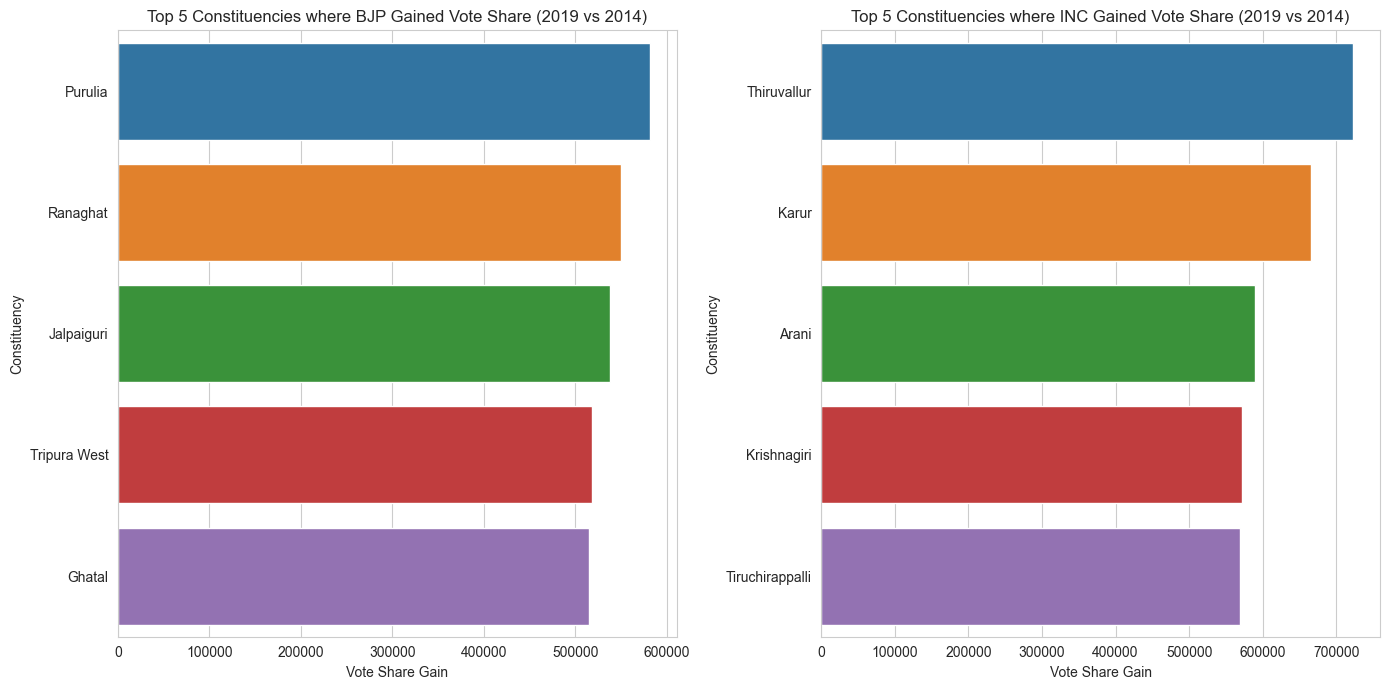

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='vote_share_gain', y='constituency', data=top_bjp_vote_gain_constituencies, hue='constituency', legend=False)
plt.title('Top 5 Constituencies where BJP Gained Vote Share (2019 vs 2014)')
plt.xlabel('Vote Share Gain')
plt.ylabel('Constituency')

plt.subplot(1, 2, 2)
sns.barplot(x='vote_share_gain', y='constituency', data=top_inc_vote_gain_constituencies, hue='constituency', legend=False)
plt.title('Top 5 Constituencies where INC Gained Vote Share (2019 vs 2014)')
plt.xlabel('Vote Share Gain')
plt.ylabel('Constituency')

plt.tight_layout()
plt.show()

### 9. List top 5 constituencies for two major national parties where they have lost vote share in 2019 as compared to 2014.

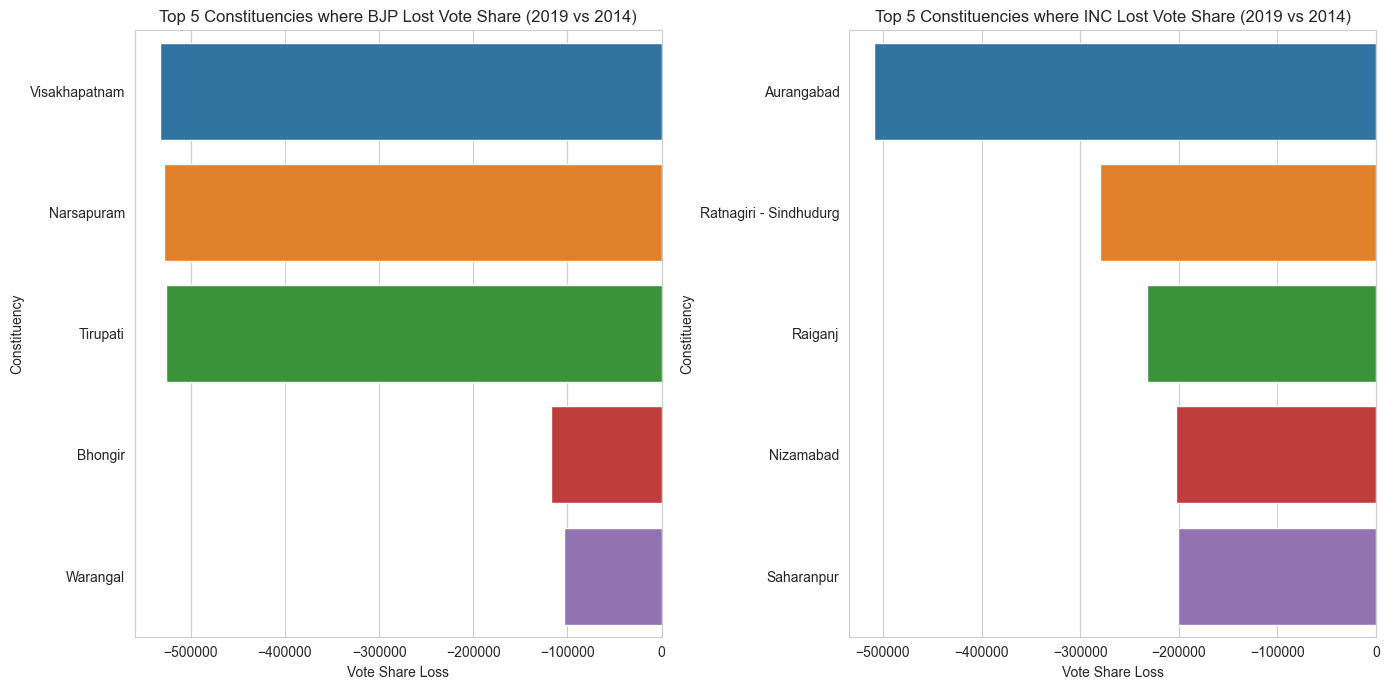

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='vote_share_loss', y='constituency', data=top_bjp_vote_lost_constituencies, hue='constituency', legend=False)
plt.title('Top 5 Constituencies where BJP Lost Vote Share (2019 vs 2014)')
plt.xlabel('Vote Share Loss')
plt.ylabel('Constituency')

plt.subplot(1, 2, 2)
sns.barplot(x='vote_share_loss', y='constituency', data=top_inc_vote_lost_constituencies, hue='constituency', legend=False)
plt.title('Top 5 Constituencies where INC Lost Vote Share (2019 vs 2014)')
plt.xlabel('Vote Share Loss')
plt.ylabel('Constituency')

plt.tight_layout()
plt.show()

### 10. Which constituency has voted the most for NOTA?

In [61]:
nota_votes_2014 = df_2014[df_2014['party'] == 'NOTA']
nota_votes_2019 = df_2019[df_2019['party'] == 'NOTA']

nota_votes_2014_sum = nota_votes_2014.groupby('constituency')['total_votes'].sum().reset_index()
nota_votes_2014_sum["Year"] = int(2014)

nota_votes_2019_sum = nota_votes_2019.groupby('constituency')['total_votes'].sum().reset_index()
nota_votes_2019_sum["Year"] = int(2019)

nota_votes_combined = pd.concat([nota_votes_2014_sum, nota_votes_2019_sum],axis=0)

nota_votes_combined["Constituency & Year"] = nota_votes_combined["constituency"] + " - " + nota_votes_combined["Year"].astype("str")
nota_votes_combined.rename(columns={"total_votes":"total_nota_votes"},inplace=True)

nota_votes_combined.sort_values("total_nota_votes",ascending=False).head(10)[["Constituency & Year","total_nota_votes"]].reset_index(drop=True)

,Constituency & Year,total_nota_votes
0,Gopalganj (Sc) - 2019,51660
1,Aruku - 2019,47977
2,Nilgiris - 2014,46559
3,Paschim Champaran - 2019,45699
4,Nabarangpur - 2019,44582
5,Bastar - 2019,41667
6,Jamui (Sc) - 2019,39496
7,Madhepura - 2019,38450
8,Koraput - 2019,36561
9,Ratlam - 2019,35431


##### In 2019, the Gopalganj (Sc) constituency recorded the highest number of NOTA votes with 51,660, while in 2014, Nilgiris had the highest number of NOTA votes with 46,559.


#####

### 11. Which constituencies have elected candidates whose party has less than 10% vote share at state level in 2019?

In [62]:
state_votes_2019 = df_2019.groupby(['state', 'party'])['total_votes'].sum().reset_index()
total_state_votes_2019 = df_2019.groupby('state')['total_votes'].sum().reset_index()
state_votes_2019 = state_votes_2019.merge(total_state_votes_2019, on='state', suffixes=('', '_total'))

state_votes_2019['vote_share_percentage'] = (state_votes_2019['total_votes'] / state_votes_2019['total_votes_total']) * 100

low_vote_share_parties = state_votes_2019[state_votes_2019['vote_share_percentage'] < 10]
low_vote_share_parties = low_vote_share_parties.groupby(['state', 'party'])[['state','party', 'vote_share_percentage']]
low_vote_share_parties = low_vote_share_parties.apply(lambda x:x).reset_index(drop=True)
winners_2019 = df_2019.loc[df_2019.groupby('constituency')['total_votes'].idxmax()]
con_winner_state_low = pd.merge(winners_2019,low_vote_share_parties,on=["state","party"],how="inner",suffixes=["_left","_right"])
con_winner_state_low.rename(columns={"candidate":"winning_candidate","vote_share_percentage":"state_level_vote_share_percentage"},inplace=True)
con_winner_state_low = (con_winner_state_low[["winning_candidate","party","constituency","state","state_level_vote_share_percentage"]]
                        .sort_values("state_level_vote_share_percentage")
                        .reset_index(drop=True))

In [63]:
con_winner_state_low

,winning_candidate,party,constituency,state,state_level_vote_share_percentage
0,K. NAVASKANI,IUML,Ramanathapuram,Tamil Nadu,1.082996
1,THIRUMAAVALAVAN THOL,VCK,Chidambaram,Tamil Nadu,1.152790
2,Anupriya Singh Patel,ADAL,Mirzapur,Uttar Pradesh,1.201967
3,PAKAURI LAL KOL,ADAL,Robertsganj,Uttar Pradesh,1.201967
4,HANUMAN BENIWAL,RLTP,Nagaur,Rajasthan,2.034616
5,Thomas Chazhikadan,KEC(M),Kottayam,Kerala,2.065448
6,NATARAJAN. P.R,CPIM,Coimbatore,Tamil Nadu,2.348318
7,VENKATESAN S,CPIM,Madurai,Tamil Nadu,2.348318
8,"SUBBARAYAN, K.",CPI,Tiruppur,Tamil Nadu,2.377387
9,SELVARAJ M,CPI,Nagapattinam,Tamil Nadu,2.377387


In [64]:
print(list(con_winner_state_low["constituency"].unique()))

['Ramanathapuram', 'Chidambaram', 'Mirzapur', 'Robertsganj', 'Nagaur', 'Kottayam', 'Coimbatore', 'Madurai', 'Tiruppur', 'Nagapattinam', 'Kollam', 'Hyderabad', 'Amravati', 'Mandya', 'Giridih', 'Kokrajhar', 'Ponnani', 'Malappuram', 'Maldaha Dakshin', 'Baharampur', 'Rae Bareli', 'Sangrur', 'Kishanganj', 'Dhubri', 'Vaishali', 'Nawada', 'Khagaria', 'Jamui (Sc)', 'Hajipur (Sc)', 'Samastipur (Sc)', 'Srinagar', 'Baramulla', 'Anantnag', 'Hoshiarpur', 'Gurdaspur', 'Hassan']


The constituencies which have elected candidates whose party secured less than 10% of the vote share at the state level in 2019:


Ramanathapuram, Chidambaram, Mirzapur, Robertsganj, Nagaur, Kottayam, Coimbatore, Madurai, Tiruppur, Nagapattinam, Kollam, Hyderabad, Amravati, Mandya, Giridih, Kokrajhar, Ponnani, Malappuram, Maldaha Dakshin, Baharampur, Rae Bareli, Sangrur, Kishanganj, Dhubri, Vaishali, Nawada, Khagaria, Jamui (Sc), Hajipur (Sc), Samastipur (Sc), Srinagar, Baramulla, Anantnag, Hoshiarpur, Gurdaspur, and Hassan.




### 12. Is there a correlation between postal votes % and voter turnout %?

In [65]:
grouped_2014_constituency = df_2014.groupby(['constituency',"state", 'total_electors']).sum().reset_index()
grouped_2019_constituency = df_2019.groupby(['constituency',"state", 'total_electors']).sum().reset_index()

new_grouped_2014_state = grouped_2014_constituency.groupby(['state'])[["postal_votes","total_votes","total_electors"]].sum().reset_index()
new_grouped_2019_state = grouped_2019_constituency.groupby(['state'])[["postal_votes","total_votes","total_electors"]].sum().reset_index()

new_grouped_2014_state['voter_turnout_ratio (%)'] = (grouped_2014_state['total_votes'] / grouped_2014_state['total_electors'])*100
new_grouped_2019_state['voter_turnout_ratio (%)'] = (grouped_2019_state['total_votes'] / grouped_2019_state['total_electors'])*100

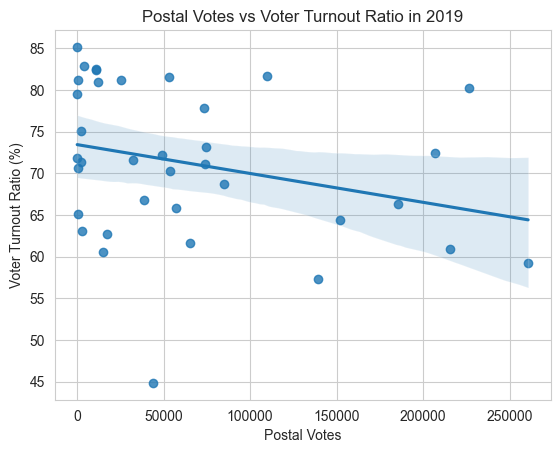

In [66]:
sns.regplot(x='postal_votes', y='voter_turnout_ratio (%)', data=new_grouped_2019_state)
plt.title('Postal Votes vs Voter Turnout Ratio in 2019')
plt.xlabel('Postal Votes')
plt.ylabel('Voter Turnout Ratio (%)')
plt.show()

In [67]:
new_grouped_2019_state[["postal_votes","voter_turnout_ratio (%)"]].corr()

,postal_votes,voter_turnout_ratio (%)
postal_votes,1.000000,-0.281793
voter_turnout_ratio (%),-0.281793,1.000000


In [68]:
from scipy.stats import pearsonr

correlation_2019, p_value_2019 = pearsonr(new_grouped_2019_state['postal_votes'], new_grouped_2019_state['voter_turnout_ratio (%)'])
print("Pearson correlation coefficient for 2019:", correlation_2019)
print("P-value for 2019:", p_value_2019)

Pearson correlation coefficient for 2019: -0.2817932663231554
P-value for 2019: 0.09590779865985091


##### There is no correlation between the percentage of postal votes and the voter turnout percentage, as per visualization and correlation coefficient analysis.



#####

### 13. Is there any correlation between GDP of a state and voter turnout %?

In [69]:
gsdp = pd.read_html("https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP",flavor="bs4")[1]

In [70]:
gsdp.drop(columns=["GSDP (US$ billions)"],inplace=True)
gsdp.rename(columns={"State/union territory":"state","GSDP (₹ millions)":"gsdp_in_million_rupees"},inplace=True)
gsdp["state"] =  gsdp["state"].str.replace(" and "," & ").str.replace("*","").str.strip().str.title()

In [71]:
gsdp.loc[gsdp["state"]=="Delhi", "state"] = "NCT OF Delhi"

In [72]:
gdp_merged = pd.merge(new_grouped_2019_state,gsdp,on="state",how="inner")

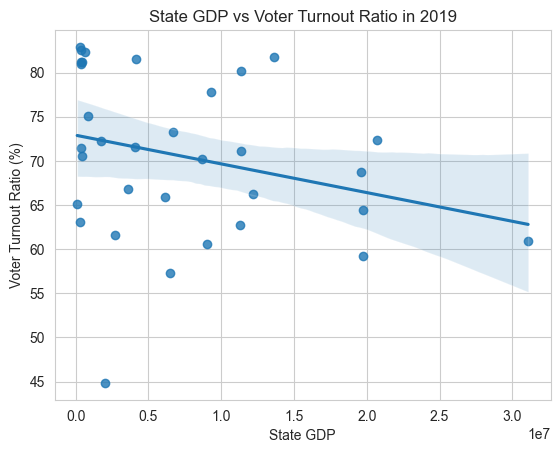

In [73]:
sns.regplot(x='gsdp_in_million_rupees', y='voter_turnout_ratio (%)', data=gdp_merged)
plt.title('State GDP vs Voter Turnout Ratio in 2019')
plt.xlabel('State GDP')
plt.ylabel('Voter Turnout Ratio (%)')
plt.show()

In [74]:
gdp_merged[["gsdp_in_million_rupees","voter_turnout_ratio (%)"]].corr()

,gsdp_in_million_rupees,voter_turnout_ratio (%)
gsdp_in_million_rupees,1.000000,-0.278663
voter_turnout_ratio (%),-0.278663,1.000000


In [75]:
correlation_2019, p_value_2019 = pearsonr(gdp_merged['gsdp_in_million_rupees'], gdp_merged['voter_turnout_ratio (%)'])
print("Pearson correlation coefficient for 2019:", correlation_2019)
print("P-value for 2019:", p_value_2019)

Pearson correlation coefficient for 2019: -0.27866302040424706
P-value for 2019: 0.11633099500828235


##### There is no correlation between the GDP of a state and the voter turnout percentage, as per visualization and correlation coefficient analysis.



#####

### 14. Is there any correlation between literacy % of a state and voter turnout %?

In [76]:
lrate = pd.read_html("https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_literacy_rate",flavor="bs4")[1]
lrate.head(5)

State or UT Census 2011[2]          
                                         State or UT        Average   Male   
0                                              India          74.04  82.14  \
1  A&N islands.mw-parser-output .citation{word-wr...          86.63  90.27   
2                                  Andhra Pradesh[a]          67.02  74.88   
3                                  Arunachal Pradesh          65.38  72.55   
4                                              Assam          72.19  77.85   

         NSO survey (2017)[3]                
  Female              Average   Male Female  
0  65.46                77.70  84.70  70.30  
1  82.43                86.27  90.11  81.84  
2  59.15                66.90  80.00  59.50  
3  57.70                66.95  73.40  59.50  
4  66.27                85.90  90.10  81.20

In [77]:
lrate.columns = ["a","b","c","d","e","f","g"]

In [78]:
lrate.drop(columns=["b","c","d","f","g"],inplace = True)

In [79]:
lrate.rename(columns={"a":"state","e":"literacy_rate"},inplace=True)

In [80]:
lrate["state"] = lrate["state"].str.replace(r'\..*|\[.*',"",regex=True)

In [81]:
lrate.loc[lrate["state"]=="A&N islands","state"] = "Andaman & Nicobar Islands"
lrate.loc[lrate["state"]=="Delhi","state"] = "NCT OF Delhi"

In [82]:
lrate["state"] = lrate["state"].str.replace(" and "," & ").str.strip().str.title()

In [83]:
lrate_merged = pd.merge(new_grouped_2019_state,lrate,on="state",how="inner")

In [84]:
lrate_merged.head()

,state,postal_votes,total_votes,total_electors,voter_turnout_ratio (%),literacy_rate
0,Andaman & Nicobar Islands,216,207296,318471,65.091013,86.27
1,Andhra Pradesh,226413,31612534,39405967,80.222708,66.90
2,Arunachal Pradesh,25114,652091,803563,81.149953,66.95
3,Assam,53181,17986066,22050059,81.569242,85.90
4,Bihar,139317,40806661,71216290,57.299616,70.90


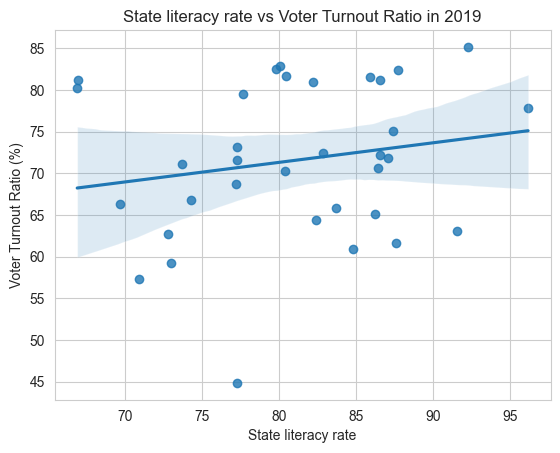

In [85]:
sns.regplot(x='literacy_rate', y='voter_turnout_ratio (%)', data=lrate_merged)
plt.title('State literacy rate vs Voter Turnout Ratio in 2019')
plt.xlabel('State literacy rate')
plt.ylabel('Voter Turnout Ratio (%)')
plt.show()

In [86]:
lrate_merged[["literacy_rate","voter_turnout_ratio (%)"]].corr()

,literacy_rate,voter_turnout_ratio (%)
literacy_rate,1.000000,0.183347
voter_turnout_ratio (%),0.183347,1.000000


In [87]:
correlation_2019, p_value_2019 = pearsonr(lrate_merged['literacy_rate'], lrate_merged['voter_turnout_ratio (%)'])
print("Pearson correlation coefficient for 2019:", correlation_2019)
print("P-value for 2019:", p_value_2019)

Pearson correlation coefficient for 2019: 0.18334699790260575
P-value for 2019: 0.2993024555627321


##### There is no correlation between the literacy rate of a state and the voter turnout percentage, as per visualization and correlation coefficient analysis.



#####

### Proportion of Candidates by sex

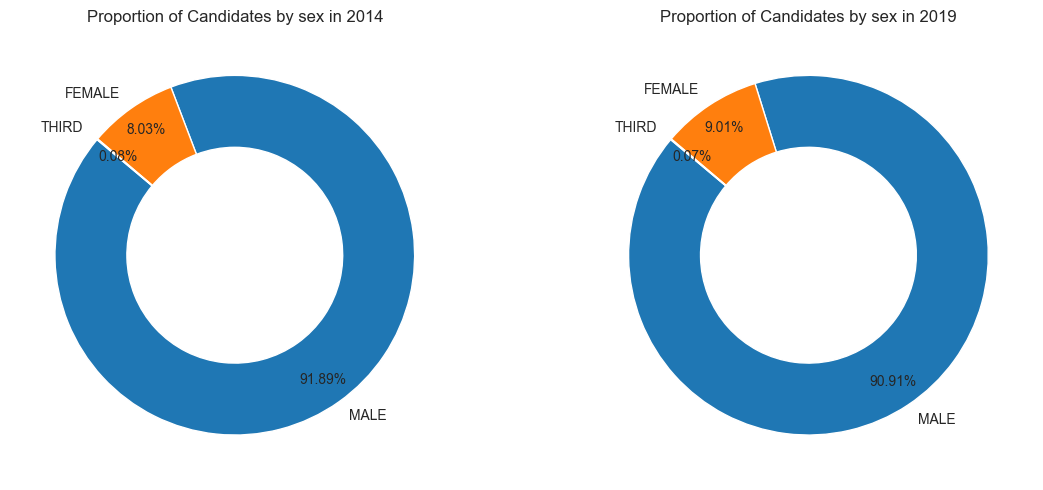

In [89]:
import matplotlib.pyplot as plt

sex_count_2014 = df_2014['sex'].value_counts()
sex_count_2019 = df_2019['sex'].value_counts()

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.pie(sex_count_2014, labels=sex_count_2014.index, autopct='%1.2f%%',startangle=140, pctdistance=0.85 , wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title("Proportion of Candidates by sex in 2014")

plt.subplot(1, 2, 2)
plt.pie(sex_count_2019, labels=sex_count_2019.index, autopct='%1.2f%%',startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title("Proportion of Candidates by sex in 2019")

plt.tight_layout()
plt.show()


### Proportion of Candidates by age

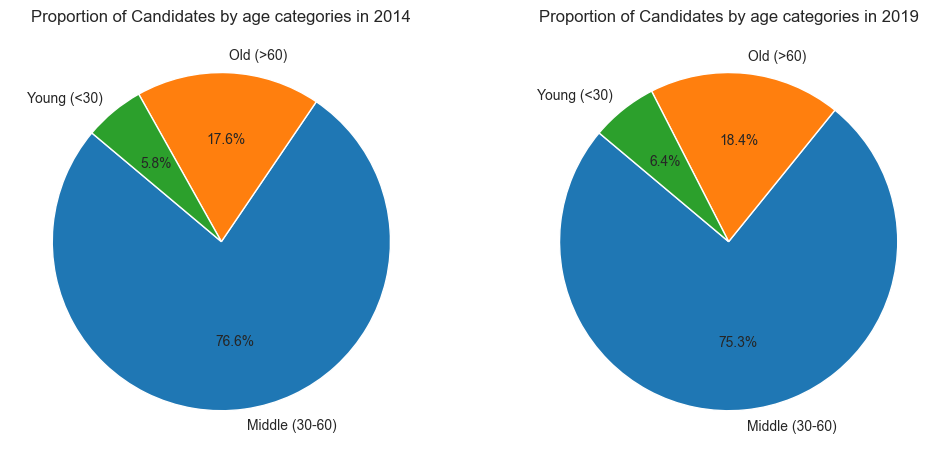

In [90]:
age_bins = [0, 30, 60, 100]
age_labels = ['Young (<30)', 'Middle (30-60)', 'Old (>60)']

df_2014['Age_Group_2014'] = pd.cut(df_2014['age'], bins=age_bins, labels=age_labels, right=False)
df_2019['Age_Group_2019'] = pd.cut(df_2019['age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts_2014 = df_2014['Age_Group_2014'].value_counts()
age_group_counts_2019 = df_2019['Age_Group_2019'].value_counts()

fig, axs = plt.subplots(1,2, figsize=(12, 6))
colors = sns.color_palette("Set1")

plt.subplot(1, 2, 1)
plt.pie(age_group_counts_2014, labels=age_group_counts_2014.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Candidates by age categories in 2014")

plt.subplot(1, 2, 2)
plt.pie(age_group_counts_2019, labels=age_group_counts_2019.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Candidates by age categories in 2019")

plt.show()


### Distribution of voter turnout ratio

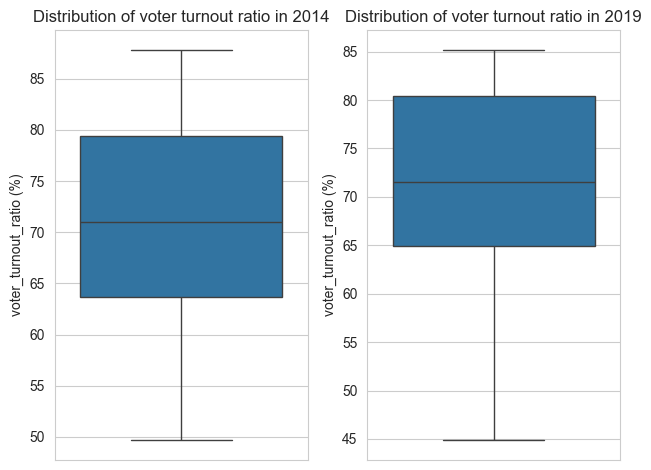

In [91]:
plt.subplot(1,2,1)
sns.boxplot(new_grouped_2014_state["voter_turnout_ratio (%)"])
plt.title("Distribution of voter turnout ratio in 2014")

plt.subplot(1,2,2)
sns.boxplot(new_grouped_2019_state["voter_turnout_ratio (%)"])
plt.title("Distribution of voter turnout ratio in 2019")

plt.tight_layout()
plt.show()

In [94]:
new_grouped_2014_state["voter_turnout_ratio (%)"].describe()

count    34.000000
mean     71.507249
std       9.756098
min      49.656118
25%      63.650510
50%      71.035033
75%      79.387912
max      87.822028
Name: voter_turnout_ratio (%), dtype: float64

In [96]:
new_grouped_2019_state["voter_turnout_ratio (%)"].describe()

count    36.000000
mean     71.237773
std       9.195479
min      44.841969
25%      64.920384
50%      71.498234
75%      80.422924
max      85.178206
Name: voter_turnout_ratio (%), dtype: float64

### Top parties with the highest number of female candidates in 2019 election:

In [92]:
female_candidates = df_2019[df_2019['sex'] == 'FEMALE']

female_candidates_count = female_candidates.groupby('party')['candidate'].count().reset_index()

female_candidates_count_sorted = female_candidates_count.sort_values(by='candidate', ascending=False)

top_ten_female_candidates = female_candidates_count_sorted.head(10)

top_ten_female_candidates.rename(columns={"candidate":"No. of Female Candidates"})

,party,No. of Female Candidates
61,IND,228
30,BJP,55
60,INC,54
41,BSP,24
14,AITC,23
103,NTK,19
148,SUCI(C),16
110,PPOI,12
47,CPIM,12
143,SHS,12


### Top parties with the highest number of young candidates in 2019 election:

In [93]:
young_candidates = df_2019[df_2019['Age_Group_2019'] == 'Young (<30)']

young_candidates_count = young_candidates.groupby('party')['candidate'].count().reset_index()

young_candidates_count_sorted = young_candidates_count.sort_values(by='candidate', ascending=False)

top_parties_young_candidates = young_candidates_count_sorted.head(10)
top_parties_young_candidates.rename(columns={"candidate":"no of young(<30) candidates"})

,party,no of young(<30) candidates
60,IND,281
46,BSP,11
13,APoI,10
23,BHAPRAP,7
118,SHS,6
98,PSPL,6
38,BMUP,6
1,AAPP,6
58,HND,5
93,NTK,5


### Top 5 states with an increase in voter turnout percentage

In [109]:
mymerge = pd.merge(new_grouped_2014_state,new_grouped_2019_state,on="state",suffixes=["_2014","_2019"])
mymerge["difference_in_voter_turnout"] = mymerge["voter_turnout_ratio (%)_2019"]-mymerge["voter_turnout_ratio (%)_2014"]
mymerge = mymerge.sort_values("difference_in_voter_turnout",ascending=False)
mymerge.head(5)[["state","voter_turnout_ratio (%)_2014","voter_turnout_ratio (%)_2019","difference_in_voter_turnout"]]

,state,voter_turnout_ratio (%)_2014,voter_turnout_ratio (%)_2019,difference_in_voter_turnout
17,Madhya Pradesh,61.593944,71.163307,9.569364
11,Himachal Pradesh,64.416929,72.244292,7.827363
15,Kerala,73.893837,77.791809,3.897973
26,Rajasthan,63.055840,66.266010,3.210170
13,Jharkhand,63.798871,66.779978,2.981108


### Top 5 states with a decrease in voter turnout percentage

In [110]:
mymerge_low = mymerge.sort_values("difference_in_voter_turnout",ascending=True)
mymerge_low.head(5)[["state","voter_turnout_ratio (%)_2014","voter_turnout_ratio (%)_2019","difference_in_voter_turnout"]]

,state,voter_turnout_ratio (%)_2014,voter_turnout_ratio (%)_2019,difference_in_voter_turnout
29,Telangana,68.973911,62.752488,-6.221423
7,Daman & Diu,78.007100,71.849023,-6.158078
0,Andaman & Nicobar Islands,70.659341,65.091013,-5.568328
23,Nagaland,87.822028,82.911194,-4.910834
12,Jammu & Kashmir,49.656118,44.841969,-4.814149


### Key Insights:

1. Not only do the Anantnag, Srinagar, and Baramulla constituencies, which belong to Jammu & Kashmir, have the lowest voter turnout ratios, but also the ratios for Anantnag and Srinagar decreased drastically.

2. In both years, Dhubri recorded the highest voter turnout ratio.

3. In both years, Jammu & Kashmir, Bihar, and Uttar Pradesh have consistently recorded the lowest voter turnout ratios, each registering less than 60 percent.

4. It was observed that BJP appeared in the top 17 out of top 20 cases where the same party was elected for two consecutive elections, ranked by the percentage of votes to that winning party in 2019.

5. The top 5 candidates with the highest margin difference compared to the runner-up in both years belong to the BJP party.

6. In both years, BJP received the highest percentage of votes at the national level, while INC secured the second-highest percentage of votes in both years.

7. In 2019, the Gopalganj (Sc) constituency recorded the highest number of NOTA votes with 51,660, while in 2014, Nilgiris had the highest number of NOTA votes with 46,559.

8. There is no correlation between the percentage of postal votes and the voter turnout percentage, as per visualization and correlation coefficient analysis.

9. There is no correlation between the GDP of a state and the voter turnout percentage, as per visualization and correlation coefficient analysis.

10. There is no correlation between the literacy rate of a state and the voter turnout percentage, as per visualization and correlation coefficient analysis.

11. More than 90 % of candidates are male.

12. Around 5.8% of candidates are less than 30 years in 2014 and 6.8% in 2019

13. The party IND has both highest number of female candidates and young (<30) candidates in 2019.

14. There is no significant difference in the quartile range, median, mean and standard deviation of the voter turnout ratio (%) between 2019 and 2014.

15. The voter turnout percentage in Madhya Pradesh increased from 61.59% in 2014 to 71.16% in 2019, a difference of 9.57% which is highest difference among other states.


### Provide 3 recommendations on what the election commission /government can do to increase the voter turnout %?

##### Despite Advances in Technology, Voter Turnout Needs Improvement:
Though technology has advanced since 2014, allowing people to view political ads and voter awareness campaigns through mobile devices, and transportation has improved, we do not see any significant improvement in voter turnout percentage. Therefore, strong voter awareness and education are needed.

### Recommendations:

##### 1. Increase Voter Awareness:

The government needs to enhance voter awareness campaigns across India, with a special focus on states like **Jammu & Kashmir, Bihar, and Uttar Pradesh**, where the voter turnout percentage has been **less than 60%** in both 2014 and 2019.

###### 2. Implement Successful Strategies:

The voter turnout percentage in **Madhya Pradesh increased from 61.59% in 2014 to 71.16% in 2019, a difference of 9.57%**. The government should analyze any initiatives or changes that contributed to this increase and consider implementing similar strategies in other states.

###### 3. Support for Disabled and Elderly Voters:

Identify and provide special support for people with disabilities and elderly voters to ensure they can participate in the voting process. This could include accessible polling stations, mobile voting units, and transportation services.